In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from haversine import haversine, Unit

In [2]:
train_data = pd.read_csv('train.csv', parse_dates=['month'])
train_data

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,eco_category,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,resale_price
0,2001-08-01,pasir ris,4 room,440,pasir ris drive 4,01 to 03,118.0,model a,uncategorized,1989,1.369008,103.958697,0.0,pasir ris drive,pasir ris,east region,209700.0
1,2014-10-01,punggol,5-room,196B,punggol field,10 to 12,110.0,improved,uncategorized,2003,1.399007,103.906991,0.0,punggol field,punggol,north-east region,402300.0
2,2020-09-01,sengkang,5 room,404A,fernvale lane,01 to 03,112.0,premium apartment,uncategorized,2004,1.388348,103.873815,0.0,fernvale,sengkang,north-east region,351000.0
3,2000-10-01,clementi,3 room,375,clementi avenue 4,07 to 09,67.0,new generation,uncategorized,1980,1.318493,103.766702,0.0,clementi north,clementi,west region,151200.0
4,2013-01-01,bukit batok,3-room,163,bukit batok street 11,07 to 09,73.0,model a,uncategorized,1985,1.348149,103.742658,0.0,bukit batok west,bukit batok,west region,318600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431727,2005-03-01,woodlands,4 room,537,Woodlands Drive 16,01 to 03,101.0,model a,uncategorized,2000,1.429658,103.792583,0.0,woodlands south,woodlands,north region,238500.0
431728,2016-04-01,sengkang,4 room,410A,fernvale road,13 to 15,95.0,premium apartment,uncategorized,2012,1.390053,103.875941,0.0,fernvale,sengkang,north-east region,376200.0
431729,2011-01-01,tampines,3-room,829,tampines street 81,01 to 03,67.0,new generation,uncategorized,1986,1.349224,103.934913,0.0,tampines west,tampines,east region,255600.0
431730,2013-05-01,sengkang,5-room,233,compassvale walk,16 to 18,123.0,improved,uncategorized,1999,1.389941,103.900721,0.0,sengkang town centre,sengkang,north-east region,508500.0


In [125]:
# train_data.info()

In [126]:
# eda_data = train_data.loc[:, ["month", "town", "block", "street_name", "region", "floor_area_sqm", "resale_price"]]
eda_data = train_data
eda_data["year"] = eda_data["month"].dt.strftime('%Y-%m')
eda_data

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,eco_category,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,resale_price,year
0,2001-08-01,pasir ris,4 room,440,pasir ris drive 4,01 to 03,118.0,model a,uncategorized,1989,1.369008,103.958697,0.0,pasir ris drive,pasir ris,east region,209700.0,2001-08
1,2014-10-01,punggol,5-room,196B,punggol field,10 to 12,110.0,improved,uncategorized,2003,1.399007,103.906991,0.0,punggol field,punggol,north-east region,402300.0,2014-10
2,2020-09-01,sengkang,5 room,404A,fernvale lane,01 to 03,112.0,premium apartment,uncategorized,2004,1.388348,103.873815,0.0,fernvale,sengkang,north-east region,351000.0,2020-09
3,2000-10-01,clementi,3 room,375,clementi avenue 4,07 to 09,67.0,new generation,uncategorized,1980,1.318493,103.766702,0.0,clementi north,clementi,west region,151200.0,2000-10
4,2013-01-01,bukit batok,3-room,163,bukit batok street 11,07 to 09,73.0,model a,uncategorized,1985,1.348149,103.742658,0.0,bukit batok west,bukit batok,west region,318600.0,2013-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431727,2005-03-01,woodlands,4 room,537,Woodlands Drive 16,01 to 03,101.0,model a,uncategorized,2000,1.429658,103.792583,0.0,woodlands south,woodlands,north region,238500.0,2005-03
431728,2016-04-01,sengkang,4 room,410A,fernvale road,13 to 15,95.0,premium apartment,uncategorized,2012,1.390053,103.875941,0.0,fernvale,sengkang,north-east region,376200.0,2016-04
431729,2011-01-01,tampines,3-room,829,tampines street 81,01 to 03,67.0,new generation,uncategorized,1986,1.349224,103.934913,0.0,tampines west,tampines,east region,255600.0,2011-01
431730,2013-05-01,sengkang,5-room,233,compassvale walk,16 to 18,123.0,improved,uncategorized,1999,1.389941,103.900721,0.0,sengkang town centre,sengkang,north-east region,508500.0,2013-05


In [127]:
# num_cols = ["town", "block", "street_name", "region", "resale_price"]
# for col in num_cols:
#     sns.histplot(data=eda_data, x=col, kde=True)
#     plt.show()

In [128]:
eda_data = eda_data.assign(price_pre_sqm=eda_data['resale_price'] / eda_data['floor_area_sqm'])


In [129]:
# eda_data_pre = eda_data
# group_data = eda_data_pre.groupby(['region', 'year'])["resale_price"]
# # group_data
# fig, ax = plt.subplots(figsize=(10, 6))
# index = 0
# for name, group in group_data:
# #     if ((name[0] != 'ang mo kio') | (index>5)):
#     print(name)
#     if (name[0] != 'central region'):
#         break;
# #     print(group)
#     q1 = group.quantile(0.25)
#     q3 = group.quantile(0.75)
#     iqr = q3 - q1
#     upper_limit = q3 + 1.5 * iqr
#     lower_limit = q1 - 1.5 * iqr
#     group2 = group[(group >= lower_limit) & (group <= upper_limit)]
#     print(len(group))
#     print(len(group2))

#     variance = np.var(group)
#     mean = np.mean(group)
#     median = np.median(group)
#     print("The variance of the data is:", variance)
#     print("The mean of the data is:", mean)
#     print("The median of the data is:", median)
#     variance2 = np.var(group2)
#     mean2 = np.mean(group2)
#     median2 = np.median(group2)
#     print("The variance of the data after removing the discrete values is:", variance2)
#     print("The mean of the data after removing the discrete values is:", mean2)
#     print("The median of the data after removing the discrete values is:", median2)
#     ax.boxplot(group2, positions=[index], vert=False)
#     index += 1

# plt.show()
    
    

In [130]:
def removeOutLiners(data):
    q1 = data["value"].quantile(0.25)
    q3 = data["value"].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    data2 = data[(data >= lower_limit) & (data <= upper_limit)]
    return data2


In [131]:
def computeNumInDis(data_place, data_ref, dis):
    count = 0
    for _, centre in data_ref.iterrows():
        distance = haversine((data_place['latitude'], data_place['longitude']), (centre['latitude'], centre['longitude']),
                             unit=Unit.KILOMETERS)
        if distance <= dis:
            count += 1

In [ ]:
distance_threshold = 1

commerical_data = pd.read_csv("auxiliary-data/sg-commerical-centres.csv")
commerical_data = commerical_data.rename(columns={'lat': 'latitude', 'lng': 'longitude'})
eda_data["commercialCount"] = eda_data.apply(lambda data_place : computeNumInDis(data_place, commerical_data, distance_threshold), axis=1)
print("commercialCount")
market_data = pd.read_csv("auxiliary-data/sg-gov-markets-hawker-centres.csv")
market_data = market_data.rename(columns={'lat': 'latitude', 'lng': 'longitude'})
eda_data["marketCount"] = eda_data.apply(lambda data_place : computeNumInDis(data_place, market_data, distance_threshold), axis=1)
print("marketCount")
shopping_data = pd.read_csv("auxiliary-data/sg-shopping-malls.csv")
shopping_data = shopping_data.rename(columns={'lat': 'latitude', 'lng': 'longitude'})
eda_data["shoppingCount"] = eda_data.apply(lambda data_place : computeNumInDis(data_place, shopping_data, distance_threshold), axis=1)
print("shoppingCount")
train_station_data = pd.read_csv("auxiliary-data/sg-train-stations.csv")
train_station_data = train_station_data.rename(columns={'lat': 'latitude', 'lng': 'longitude'})
eda_data["stationCount"] = eda_data.apply(lambda data_place : computeNumInDis(data_place, train_station_data, distance_threshold), axis=1)
print("stationCount")
eda_data.to_csv("auxiliary-data/comCount.csv")

In [3]:
# load comCount.csv and check
com_data = pd.read_csv('auxiliary-data/comCount.csv', parse_dates=['month'])
com_data

,Unnamed: 0,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,eco_category,...,subzone,planning_area,region,resale_price,year,price_pre_sqm,commercialCount,marketCount,shoppingCount,stationCount
0,0,2001-08-01,pasir ris,4 room,440,pasir ris drive 4,01 to 03,118.0,model a,uncategorized,...,pasir ris drive,pasir ris,east region,209700.0,2001-08,1777.118644,0,1,0,0
1,1,2014-10-01,punggol,5-room,196B,punggol field,10 to 12,110.0,improved,uncategorized,...,punggol field,punggol,north-east region,402300.0,2014-10,3657.272727,0,0,4,9
2,2,2020-09-01,sengkang,5 room,404A,fernvale lane,01 to 03,112.0,premium apartment,uncategorized,...,fernvale,sengkang,north-east region,351000.0,2020-09,3133.928571,0,0,2,2
3,3,2000-10-01,clementi,3 room,375,clementi avenue 4,07 to 09,67.0,new generation,uncategorized,...,clementi north,clementi,west region,151200.0,2000-10,2256.716418,0,2,3,1
4,4,2013-01-01,bukit batok,3-room,163,bukit batok street 11,07 to 09,73.0,model a,uncategorized,...,bukit batok west,bukit batok,west region,318600.0,2013-01,4364.383562,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431727,431727,2005-03-01,woodlands,4 room,537,Woodlands Drive 16,01 to 03,101.0,model a,uncategorized,...,woodlands south,woodlands,north region,238500.0,2005-03,2361.386139,0,0,2,2
431728,431728,2016-04-01,sengkang,4 room,410A,fernvale road,13 to 15,95.0,premium apartment,uncategorized,...,fernvale,sengkang,north-east region,376200.0,2016-04,3960.000000,0,0,3,3
431729,431729,2011-01-01,tampines,3-room,829,tampines street 81,01 to 03,67.0,new generation,uncategorized,...,tampines west,tampines,east region,255600.0,2011-01,3814.925373,0,1,1,1
431730,431730,2013-05-01,sengkang,5-room,233,compassvale walk,16 to 18,123.0,improved,uncategorized,...,sengkang town centre,sengkang,north-east region,508500.0,2013-05,4134.146341,0,0,3,7


In [7]:
com_data.isna().any().any()

False

In [8]:
com_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431732 entries, 0 to 431731
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Unnamed: 0           431732 non-null  int64         
 1   month                431732 non-null  datetime64[ns]
 2   town                 431732 non-null  object        
 3   flat_type            431732 non-null  object        
 4   block                431732 non-null  object        
 5   street_name          431732 non-null  object        
 6   storey_range         431732 non-null  object        
 7   floor_area_sqm       431732 non-null  float64       
 8   flat_model           431732 non-null  object        
 9   eco_category         431732 non-null  object        
 10  lease_commence_date  431732 non-null  int64         
 11  latitude             431732 non-null  float64       
 12  longitude            431732 non-null  float64       
 13  elevation     

In [9]:
eda_com_data = com_data.loc[:, ["floor_area_sqm", "lease_commence_date", "price_pre_sqm", "street_name", "commercialCount", "marketCount", "shoppingCount", "stationCount", "resale_price"]]
eda_com_data

,floor_area_sqm,lease_commence_date,price_pre_sqm,street_name,commercialCount,marketCount,shoppingCount,stationCount,resale_price
0,118.0,1989,1777.118644,pasir ris drive 4,0,1,0,0,209700.0
1,110.0,2003,3657.272727,punggol field,0,0,4,9,402300.0
2,112.0,2004,3133.928571,fernvale lane,0,0,2,2,351000.0
3,67.0,1980,2256.716418,clementi avenue 4,0,2,3,1,151200.0
4,73.0,1985,4364.383562,bukit batok street 11,0,1,1,1,318600.0
...,...,...,...,...,...,...,...,...,...
431727,101.0,2000,2361.386139,Woodlands Drive 16,0,0,2,2,238500.0
431728,95.0,2012,3960.000000,fernvale road,0,0,3,3,376200.0
431729,67.0,1986,3814.925373,tampines street 81,0,1,1,1,255600.0
431730,123.0,1999,4134.146341,compassvale walk,0,0,3,7,508500.0


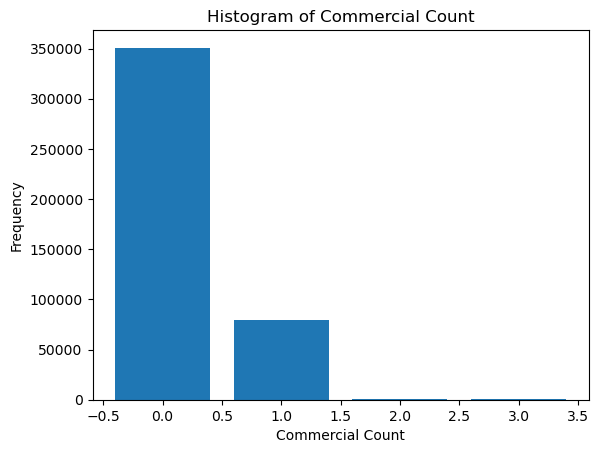

In [10]:
value_counts = eda_com_data['commercialCount'].value_counts()
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Commercial Count')
plt.ylabel('Frequency')
plt.title('Histogram of Commercial Count')
plt.show()

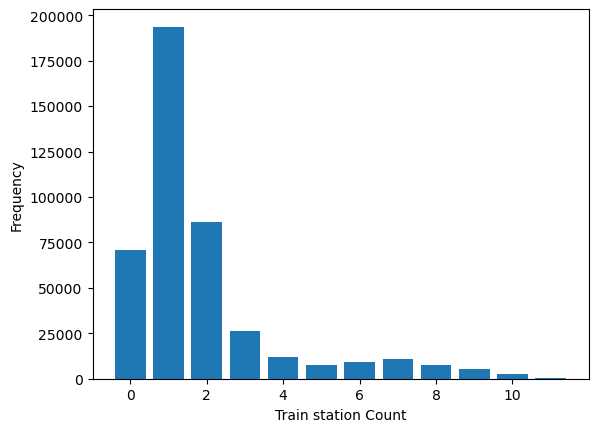

In [13]:
# use 
# commercialCount
# marketCount
# shoppingCount
# stationCount
value_counts = eda_com_data['stationCount'].value_counts()
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Train station Count')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# 1km for commercialCount is not a good distance_threshold, replace with 5 and recompute
commercial_distance_threshold = 5
commerical_data = pd.read_csv("auxiliary-data/sg-commerical-centres.csv")
commerical_data = commerical_data.rename(columns={'lat': 'latitude', 'lng': 'longitude'})
com_data["commercialCount_5"] = com_data.apply(lambda data_place : computeNumInDis(data_place, commerical_data, commercial_distance_threshold), axis=1)
com_data.to_csv("auxiliary-data/comCount2.csv")

In [26]:
com_data = pd.read_csv('auxiliary-data/comCount3.csv', parse_dates=['month'])
eda_com_data = com_data.loc[:, ["floor_area_sqm", "lease_commence_date", "price_pre_sqm", "commercialCount_5", "marketCount_3", "shoppingCount_3", "stationCount", "resale_price"]]
eda_com_data

,floor_area_sqm,lease_commence_date,price_pre_sqm,commercialCount_5,marketCount_3,shoppingCount_3,stationCount,resale_price
0,118.0,1989,1777.118644,7,2,8,2,209700.0
1,110.0,2003,3657.272727,5,0,6,25,402300.0
2,112.0,2004,3133.928571,7,5,8,7,351000.0
3,67.0,1980,2256.716418,8,8,11,2,151200.0
4,73.0,1985,4364.383562,2,4,7,4,318600.0
...,...,...,...,...,...,...,...,...
431727,101.0,2000,2361.386139,3,3,7,3,238500.0
431728,95.0,2012,3960.000000,7,1,7,7,376200.0
431729,67.0,1986,3814.925373,6,9,9,3,255600.0
431730,123.0,1999,4134.146341,7,1,12,21,508500.0


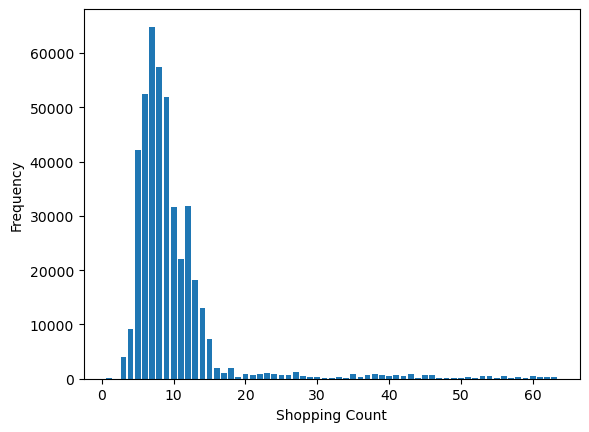

In [23]:
# use 
# commercialCount
# marketCount
# shoppingCount
# stationCount
value_counts = eda_com_data['shoppingCount_3'].value_counts()
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Shopping Count')
plt.ylabel('Frequency')
plt.show()

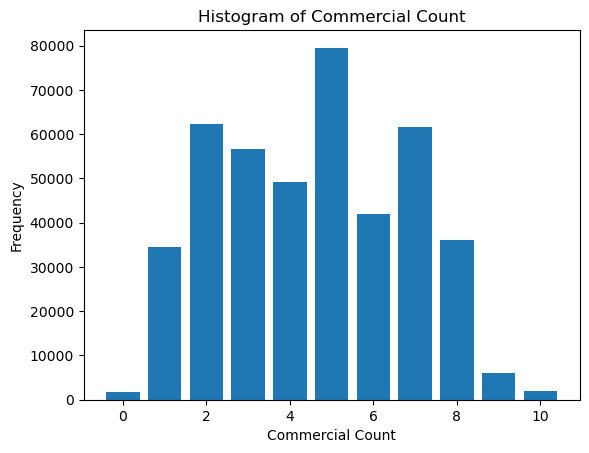

In [18]:
value_counts = eda_com_data['commercialCount_5'].value_counts()
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Commercial Count')
plt.ylabel('Frequency')
plt.title('Histogram of Commercial Count')
plt.show()

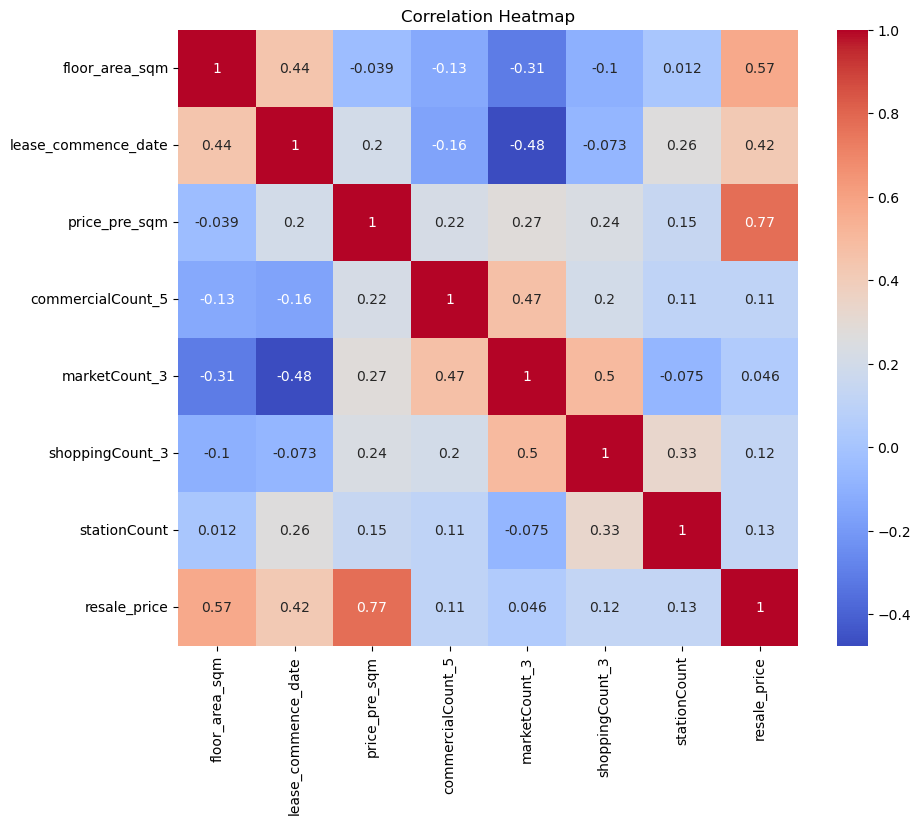

In [27]:
correlation_matrix = eda_com_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [29]:
com_data = pd.read_csv('auxiliary-data/comCount3.csv', parse_dates=['month'])
com_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431732 entries, 0 to 431731
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Unnamed: 0.2         431732 non-null  int64         
 1   Unnamed: 0.1         431732 non-null  int64         
 2   Unnamed: 0           431732 non-null  int64         
 3   month                431732 non-null  datetime64[ns]
 4   town                 431732 non-null  object        
 5   flat_type            431732 non-null  object        
 6   block                431732 non-null  object        
 7   street_name          431732 non-null  object        
 8   storey_range         431732 non-null  object        
 9   floor_area_sqm       431732 non-null  float64       
 10  flat_model           431732 non-null  object        
 11  eco_category         431732 non-null  object        
 12  lease_commence_date  431732 non-null  int64         
 13  latitude      

In [30]:
final_data = com_data.loc[:, ["resale_price","price_pre_sqm","commercialCount_5","marketCount_3","shoppingCount_3","stationCount"]]
final_data

,resale_price,price_pre_sqm,commercialCount_5,marketCount_3,shoppingCount_3,stationCount
0,209700.0,1777.118644,7,2,8,2
1,402300.0,3657.272727,5,0,6,25
2,351000.0,3133.928571,7,5,8,7
3,151200.0,2256.716418,8,8,11,2
4,318600.0,4364.383562,2,4,7,4
...,...,...,...,...,...,...
431727,238500.0,2361.386139,3,3,7,3
431728,376200.0,3960.000000,7,1,7,7
431729,255600.0,3814.925373,6,9,9,3
431730,508500.0,4134.146341,7,1,12,21


In [31]:
final_data = final_data.rename(columns={'stationCount': 'stationCount_2'})
final_data

,resale_price,price_pre_sqm,commercialCount_5,marketCount_3,shoppingCount_3,stationCount_2
0,209700.0,1777.118644,7,2,8,2
1,402300.0,3657.272727,5,0,6,25
2,351000.0,3133.928571,7,5,8,7
3,151200.0,2256.716418,8,8,11,2
4,318600.0,4364.383562,2,4,7,4
...,...,...,...,...,...,...
431727,238500.0,2361.386139,3,3,7,3
431728,376200.0,3960.000000,7,1,7,7
431729,255600.0,3814.925373,6,9,9,3
431730,508500.0,4134.146341,7,1,12,21


In [32]:
final_data.to_csv("auxiliary-data/comCountTrain.csv")

In [33]:
test_data = pd.read_csv('test.csv', parse_dates=['month'])
test_data

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,eco_category,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region
0,2004-01-01,bukit batok,4 room,186,bukit batok west avenue 6,04 to 06,94.0,new generation,uncategorized,1989,1.346581,103.744085,0.0,bukit batok west,bukit batok,west region
1,2001-11-01,tampines,5 room,366,tampines street 34,04 to 06,122.0,improved,uncategorized,1997,1.357618,103.961379,0.0,tampines east,tampines,east region
2,2002-07-01,jurong east,3 room,206,jurong east street 21,01 to 03,67.0,new generation,uncategorized,1982,1.337804,103.741998,0.0,toh guan,jurong east,west region
3,2015-04-01,ang mo kio,3 room,180,Ang Mo Kio Avenue 5,04 to 06,82.0,new generation,uncategorized,1981,1.380084,103.849574,0.0,yio chu kang east,ang mo kio,north-east region
4,2004-04-01,clementi,5 room,356,clementi avenue 2,01 to 03,117.0,standard,uncategorized,1978,1.313960,103.769831,0.0,clementi north,clementi,west region
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107929,2008-04-01,hougang,5 room,981D,buangkok crescent,10 to 12,110.0,improved,uncategorized,2003,1.380452,103.879333,0.0,trafalgar,hougang,north-east region
107930,2006-01-01,kallang/whampoa,4 room,13,upper boon keng road,13 to 15,102.0,model a,uncategorized,1999,1.314481,103.870458,0.0,boon keng,kallang,central region
107931,2000-01-01,kallang/whampoa,3 room,1,beach road,07 to 09,68.0,improved,uncategorized,1979,1.294924,103.854315,0.0,city hall,downtown core,central region
107932,2009-07-01,jurong west,4 room,919,jurong west street 91,10 to 12,104.0,model a,uncategorized,1988,1.339927,103.687354,0.0,yunnan,jurong west,west region


In [34]:
test_eda_data = test_data.loc[:, ['latitude','longitude']]
test_eda_data

,latitude,longitude
0,1.346581,103.744085
1,1.357618,103.961379
2,1.337804,103.741998
3,1.380084,103.849574
4,1.313960,103.769831
...,...,...
107929,1.380452,103.879333
107930,1.314481,103.870458
107931,1.294924,103.854315
107932,1.339927,103.687354
